In [1]:
! pip install -r requirements/pangeo.txt
! pip install -e .

Obtaining file:///home/jovyan/seager19
  Attempting uninstall: src
    Found existing installation: src 0.0.1
    Uninstalling src-0.0.1:
      Successfully uninstalled src-0.0.1
  Running setup.py develop for src


In [2]:
from src.data_loading.pangeo import GetEnsemble

In [5]:
cat = GetEnsemble("sfcWind").cat

In [16]:
gr_df = cat.search(variable_id=["ts"], experiment_id=["historical"], table_id=["Amon"], grid_label=["gr"]).df

In [19]:
gn_df = cat.search(variable_id=["ts"], experiment_id=["historical"], table_id=["Amon"], grid_label=["gn"]).df

In [20]:
len(gr_df)

126

In [21]:
len(gn_df)

441

In [46]:
joint_df = gr_df[["institution_id","source_id", "member_id"]].append(gn_df[["institution_id","source_id", "member_id"]])
print(len(joint_df))
print(len(joint_df.drop_duplicates()))
print(len(joint_df[~joint_df.duplicated(keep="first")]))

567
567
567


/tmp/ipykernel_12586/252636366.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joint_df = gr_df[["institution_id","source_id", "member_id"]].append(gn_df[["institution_id","source_id", "member_id"]])


In [49]:
df2 = gr_df[["institution_id","source_id", "member_id", "grid_label"]].append(gn_df[["institution_id","source_id", "member_id", "grid_label"]])


/tmp/ipykernel_12586/990140097.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = gr_df[["institution_id","source_id", "member_id", "grid_label"]].append(gn_df[["institution_id","source_id", "member_id", "grid_label"]])


In [57]:
gn_df["institution_id"].value_counts()

MIROC                84
NASA-GISS            77
CCCma                68
CSIRO                40
NCC                  36
MOHC                 25
MPI-M                25
NCAR                 20
MRI                  11
CAS                  10
BCC                   6
AWI                   6
NUIST                 5
CSIRO-ARCCSS          5
CMCC                  5
HAMMOZ-Consortium     3
CAMS                  3
NIMS-KMA              3
FIO-QLNM              3
UA                    2
AS-RCEC               2
SNU                   1
CCCR-IITM             1
Name: institution_id, dtype: int64

In [55]:
gr_df["institution_id"].value_counts()

CNRM-CERFACS           40
EC-Earth-Consortium    36
IPSL                   34
E3SM-Project            7
NIMS-KMA                3
CAS                     3
THU                     3
Name: institution_id, dtype: int64

In [54]:
df2["institution_id"].value_counts()

MIROC                  84
NASA-GISS              77
CCCma                  68
CSIRO                  40
CNRM-CERFACS           40
NCC                    36
EC-Earth-Consortium    36
IPSL                   34
MPI-M                  25
MOHC                   25
NCAR                   20
CAS                    13
MRI                    11
E3SM-Project            7
NIMS-KMA                6
AWI                     6
BCC                     6
NUIST                   5
CSIRO-ARCCSS            5
CMCC                    5
CAMS                    3
THU                     3
HAMMOZ-Consortium       3
FIO-QLNM                3
UA                      2
AS-RCEC                 2
CCCR-IITM               1
SNU                     1
Name: institution_id, dtype: int64

In [48]:
gn_df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NASA-GISS,GISS-E2-1-G,historical,r2i1p1f1,Amon,ts,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827
1,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Amon,ts,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180827
2,CMIP,NASA-GISS,GISS-E2-1-G,historical,r5i1p1f1,Amon,ts,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180828
3,CMIP,NASA-GISS,GISS-E2-1-G,historical,r3i1p1f1,Amon,ts,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180828
4,CMIP,NASA-GISS,GISS-E2-1-G,historical,r4i1p1f1,Amon,ts,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20180828
...,...,...,...,...,...,...,...,...,...,...,...
436,CMIP,MRI,MRI-ESM2-0,historical,r8i1p1f1,Amon,ts,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210813
437,CMIP,MRI,MRI-ESM2-0,historical,r7i1p1f1,Amon,ts,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210813
438,CMIP,MRI,MRI-ESM2-0,historical,r6i1p1f1,Amon,ts,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210907
439,CMIP,CMCC,CMCC-CM2-SR5,historical,r3i1p2f1,Amon,ts,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211108


In [43]:
df = joint_df
len(df)-len(df.drop_duplicates())


0

In [44]:
joint_df

,source_id,member_id
0,IPSL-CM6A-LR,r2i1p1f1
1,IPSL-CM6A-LR,r8i1p1f1
2,IPSL-CM6A-LR,r30i1p1f1
3,IPSL-CM6A-LR,r29i1p1f1
4,IPSL-CM6A-LR,r3i1p1f1
...,...,...
436,MRI-ESM2-0,r8i1p1f1
437,MRI-ESM2-0,r7i1p1f1
438,MRI-ESM2-0,r6i1p1f1
439,CMCC-CM2-SR5,r3i1p2f1


In [42]:
import pandas as pd
df = pd.DataFrame({'one': pd.Series([1., 1, 1]),
                   'two': pd.Series([1., 2., 1])})
df.drop_duplicates()

,one,two
0,1.0,1.0
1,1.0,2.0


In [27]:
gr_df[["source_id", "member_id"]]

,source_id,member_id
0,IPSL-CM6A-LR,r2i1p1f1
1,IPSL-CM6A-LR,r8i1p1f1
2,IPSL-CM6A-LR,r30i1p1f1
3,IPSL-CM6A-LR,r29i1p1f1
4,IPSL-CM6A-LR,r3i1p1f1
...,...,...
121,EC-Earth3,r23i1p1f1
122,EC-Earth3,r22i1p1f1
123,EC-Earth3,r24i1p1f1
124,EC-Earth3,r25i1p1f1


In [25]:
gn_df[["source_id", "member_id"]]

,source_id,member_id
0,GISS-E2-1-G,r2i1p1f1
1,GISS-E2-1-G,r1i1p1f1
2,GISS-E2-1-G,r5i1p1f1
3,GISS-E2-1-G,r3i1p1f1
4,GISS-E2-1-G,r4i1p1f1
...,...,...
436,MRI-ESM2-0,r8i1p1f1
437,MRI-ESM2-0,r7i1p1f1
438,MRI-ESM2-0,r6i1p1f1
439,CMCC-CM2-SR5,r3i1p2f1


In [9]:
import cmip6_preprocessing

In [4]:
?cmip6_preprocessing.postprocessing.interpolate_grid_label

Object `cmip6_preprocessing.postprocessing.interpolate_grid_label` not found.


In [7]:
get_vars(["ps"])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/home/jovyan/seager19/env/lib/python3.8/site-packages/cmip6_preprocessing/preprocessing.py:267: UserWarning: `FGOALS-f3-L` does not provide lon or lat bounds.
  warnings.warn("`FGOALS-f3-L` does not provide lon or lat bounds.")
/home/jovyan/seager19/env/lib/python3.8/site-packages/cmip6_preprocessing/preprocessing.py:267: UserWarning: `FGOALS-f3-L` does not provide lon or lat bounds.
  warnings.warn("`FGOALS-f3-L` does not provide lon or lat bounds.")
/home/jovyan/seager19/env/lib/python3.8/site-packages/cmip6_preprocessing/preprocessing.py:267: UserWarning: `FGOALS-f3-L` does not provide lon or lat bounds.
  warnings.warn("`FGOALS-f3-L` does not provide lon or lat bounds.")


CMIP.CMCC.CMCC-ESM2.historical.Amon.gn


TypeError: _maybe_cast_slice_bound() missing 1 required positional argument: 'kind'

In [8]:
get_vars(["pr"])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/home/jovyan/seager19/env/lib/python3.8/site-packages/cmip6_preprocessing/preprocessing.py:267: UserWarning: `FGOALS-f3-L` does not provide lon or lat bounds.
  warnings.warn("`FGOALS-f3-L` does not provide lon or lat bounds.")
/home/jovyan/seager19/env/lib/python3.8/site-packages/cmip6_preprocessing/preprocessing.py:267: UserWarning: `FGOALS-f3-L` does not provide lon or lat bounds.
  warnings.warn("`FGOALS-f3-L` does not provide lon or lat bounds.")
/home/jovyan/seager19/env/lib/python3.8/site-packages/cmip6_preprocessing/preprocessing.py:267: UserWarning: `FGOALS-f3-L` does not provide lon or lat bounds.
  warnings.warn("`FGOALS-f3-L` does not provide lon or lat bounds.")


CMIP.CMCC.CMCC-ESM2.historical.Amon.gn


TypeError: _maybe_cast_slice_bound() missing 1 required positional argument: 'kind'

In [9]:
get_vars(["pl"])

/home/jovyan/seager19/env/lib/python3.8/site-packages/intake_esm/search.py:106: UserWarning: Query returned zero results.
  warn(message)
/home/jovyan/seager19/env/lib/python3.8/site-packages/intake_esm/core.py:882: UserWarning: There are no datasets to load! Returning an empty dictionary.
  warn('There are no datasets to load! Returning an empty dictionary.')


ValueError: must supply at least one object to concatenate

In [10]:
get_vars(["ts"])


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/home/jovyan/seager19/env/lib/python3.8/site-packages/cmip6_preprocessing/preprocessing.py:267: UserWarning: `FGOALS-f3-L` does not provide lon or lat bounds.
  warnings.warn("`FGOALS-f3-L` does not provide lon or lat bounds.")
/home/jovyan/seager19/env/lib/python3.8/site-packages/cmip6_preprocessing/preprocessing.py:267: UserWarning: `FGOALS-f3-L` does not provide lon or lat bounds.
  warnings.warn("`FGOALS-f3-L` does not provide lon or lat bounds.")
/home/jovyan/seager19/env/lib/python3.8/site-packages/cmip6_preprocessing/preprocessing.py:267: UserWarning: `FGOALS-f3-L` does not provide lon or lat bounds.
  warnings.warn("`FGOALS-f3-L` does not provide lon or lat bounds.")


CMIP.CMCC.CMCC-ESM2.historical.Amon.gn


TypeError: _maybe_cast_slice_bound() missing 1 required positional argument: 'kind'

In [1]:
from src.data_loading.pangeo import _get_preproc_func, _scenario_nino34

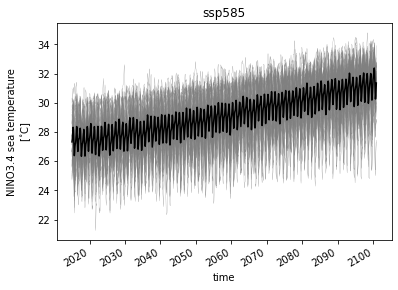

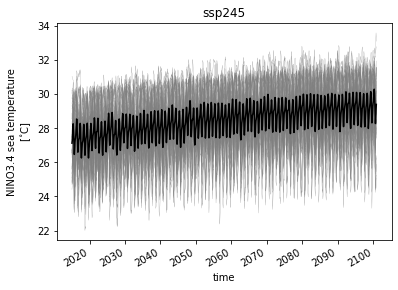

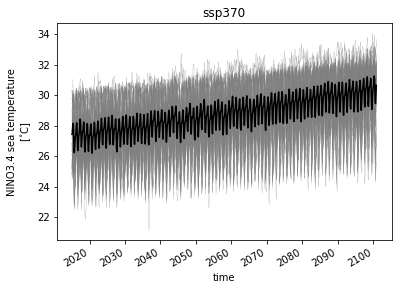

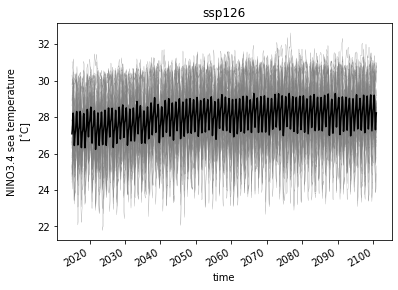

In [27]:
import matplotlib.pyplot as plt
from src.data_loading.pangeo import SCENARIOS
for scenario in SCENARIOS:
    da = _scenario_nino34(scenario=scenario) - 273.15
    da = da.where(da>20)
    da.attrs["units"] = r"$^{\circ}$C"
    da.attrs["long_name"] = "NINO3.4 sea temperature"
    da.plot.line(hue="member", color="grey", linewidth=0.2)
    da = da.mean("member")
    da.attrs["units"] = r"$^{\circ}$C"
    da.attrs["long_name"] = "NINO3.4 sea temperature"
    da.plot.line(hue="member", color="black")
    plt.title(scenario)
    plt.gca().get_legend().remove()
    plt.show()

In [2]:
import matplotlib.pyplot as plt

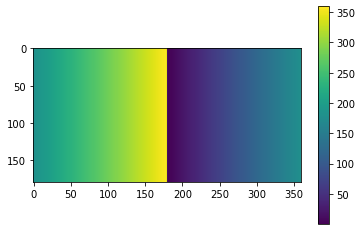

In [13]:
plt.imshow(da.assign_coords({"lon": (da.lon % 360)}).lon.values)
plt.colorbar()

In [4]:
new_da = da.rename({"x": "X", "y": "Y"}).assign_coords({"X": ("X", da.isel(y=0).lon.values % 360), "Y": ("Y",  da.isel(x=0).lat.values)}).drop_vars(["lon", "lat"]).sortby("X")# "lon": "X", "lat": "Y"})

/home/jovyan/seager19/env/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [6]:
from src.xr_utils import sel, spatial_mean

In [7]:
nino34 = spatial_mean(sel(new_da, reg="nino3.4"))

In [ ]:
nino34.plot.line(hue="member")
plt.gca().get_legend().remove()

/home/jovyan/seager19/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jovyan/seager19/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jovyan/seager19/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


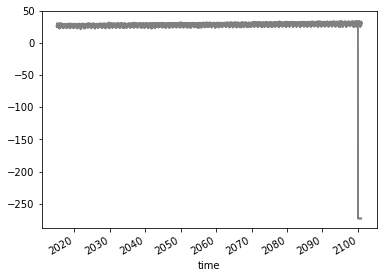

In [11]:
for i in range(len(nino34.member.values)):
    (nino34 -273.15).isel(member=i).plot(color="grey")
    plt.title("")